# Import Libraries

In [17]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Plotly visualizations
from plotly import tools
import plotly.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

# Display properties
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
from IPython.display import display, HTML

# Date
import datetime
from datetime import date, timedelta


# Maps
from math import pi

import pickle 

from sklearn.preprocessing import StandardScaler

In [18]:
#Sklearn packages

# Import required packages for pre and post processing
from sklearn.preprocessing import normalize

# Perform the necessary imports
from scipy.cluster.hierarchy import linkage, dendrogram



# Call Pickle

In [3]:
with open('fifa_processed.pkl', 'rb') as f:
    fifa = pickle.load(f)


In [14]:
with open('predictors_processed.pkl', 'rb') as f:
    predictors = pickle.load(f)


In [5]:
pd.__version__

'0.25.1'

---

# Anomoly_Detection

In [15]:
# Define numeric and non-numeric columns
numeric_cols=['Age', 'Overall','Potential','Special','International Reputation', 'Weak Foot', 'Skill Moves',
               'Height', 'Weight','LS','ST','RS',  'LW',  'LF',  'CF',  'RF',  'RW',  'LAM',  'CAM',  'RAM', 
               'LM',  'LCM',  'CM',  'RCM',  'RM',  'LWB',  'LDM',  'CDM',  'RDM',  'RWB',  'LB',  'LCB',  'CB',
               'RCB',  'RB',  'Crossing',  'Finishing',  'HeadingAccuracy',  'ShortPassing',  'Volleys', 
               'Dribbling',  'Curve',  'FKAccuracy',  'LongPassing',  'BallControl',  'Acceleration',  
               'SprintSpeed',  'Agility',  'Reactions',  'Balance',  'ShotPower',  'Jumping',  'Stamina',  
               'Strength',  'LongShots',  'Aggression',  'Interceptions',  'Positioning',  'Vision',  
               'Penalties',  'Composure',  'Marking',  'StandingTackle',  'SlidingTackle',  'GKDiving',  
               'GKHandling',  'GKKicking',  'GKPositioning',  'GKReflexes',  'Club_Reputation',  
               'Position_Potential',  'Attacking',  'Skill',  'Movement',  'Power',  'Mentality',  
               'Defending',  'GoalKeeping',  'Potential_Difference',  'Attack_WR',  'Defense_WR']

non_numeric_cols=['Position_CAM',  'Position_CB',  'Position_CDM',  'Position_CF',  'Position_CM',  
                   'Position_GK',  'Position_LAM',  'Position_LB',  'Position_LCB',  'Position_LCM',  
                   'Position_LDM',  'Position_LF',  'Position_LM',  'Position_LS',  'Position_LW',  
                   'Position_LWB',  'Position_RAM',  'Position_RB',  'Position_RCB',  'Position_RCM',  
                   'Position_RDM',  'Position_RF',  'Position_RM',  'Position_RS',  'Position_RW',  
                   'Position_RWB',  'Position_ST',  'Continent_Africa',  'Continent_Asia',  'Continent_Europe',
                   'Continent_North America',  'Continent_Oceania',  'Continent_South America',  
                   'Position_Group_Defender',  'Position_Group_Forward',  'Position_Group_GoalKeeper', 
                   'Position_Group_Midfielder', 'Preferred Foot','Real Face','Body Type']
len(numeric_cols) + len(non_numeric_cols)

121

**Scale the data before running**

Scale numeric features, then merge them with non numeric features

In [19]:
scl = StandardScaler()

#Scale the numeric columns
predictors_num = pd.DataFrame(scl.fit_transform(predictors[numeric_cols]), columns=numeric_cols)

#Merge scaled numerics with the dummy/ordinal columns
predictors_scaled = pd.concat([predictors_num,predictors[non_numeric_cols]], axis=1)

In [20]:
predictors_scaled.head()

,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,...,Attacking,Skill,Movement,Power,Mentality,Defending,GoalKeeping,Potential_Difference,Attack_WR,Defense_WR,Position_CAM,Position_CB,Position_CDM,Position_CF,Position_CM,Position_GK,Position_LAM,Position_LB,Position_LCB,Position_LCM,Position_LDM,Position_LF,Position_LM,Position_LS,Position_LW,Position_LWB,Position_RAM,Position_RB,Position_RCB,Position_RCM,Position_RDM,Position_RF,Position_RM,Position_RS,Position_RW,Position_RWB,Position_ST,Continent_Africa,Continent_Asia,Continent_Europe,Continent_North America,Continent_Oceania,Continent_South America,Position_Group_Defender,Position_Group_Forward,Position_Group_GoalKeeper,Position_Group_Midfielder,Preferred Foot,Real Face,Body Type
0,1.258441,4.013364,3.697415,2.213984,9.864420,1.593944,2.167171,-1.670713,-0.447583,1.818665,1.818665,1.818665,1.901392,1.973099,1.973099,1.973099,1.901392,1.957564,1.957564,1.957564,1.828702,1.603458,1.603458,1.603458,1.828702,0.646400,0.519988,0.519988,0.519988,0.646400,0.427328,-0.114632,-0.114632,-0.114632,0.427328,1.865922,2.532567,1.018552,2.130287,2.435355,2.201445,2.491426,2.925736,2.237037,2.255198,1.767621,1.452129,1.862187,3.680643,2.195382,...,2.367037,2.652691,2.491225,1.477531,1.581089,-0.874941,-0.333393,-0.935691,-0.418496,-0.170930,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1
1,1.686666,4.013364,3.697415,2.309273,9.864420,1.593944,3.489672,1.019186,1.091577,1.967451,1.967451,1.967451,1.757292,1.828258,1.828258,1.828258,1.757292,1.716682,1.716682,1.716682,1.684202,1.454577,1.454577,1.454577,1.684202,0.696360,0.519988,0.519988,0.519988,0.696360,0.527106,0.174842,0.174842,0.174842,0.527106,1.865922,2.481351,2.111799,1.518005,2.491871,1.725503,1.839066,1.895887,1.584613,2.135338,1.633639,1.793436,1.591288,3.791628,0.426820,...,2.501665,2.010038,2.044295,2.777910,1.853981,-0.956497,-0.286336,-0.935691,1.498141,-2.159343,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,2
2,0.187878,3.724114,3.534396,1.997752,9.864420,3.108090,3.489672,-0.923519,-1.024769,1.620283,1.620283,1.620283,1.757292,1.779978,1.779978,1.779978,1.757292,1.764859,1.764859,1.764859,1.684202,1.454577,1.454577,1.454577,1.684202,0.696360,0.470696,0.470696,0.470696,0.696360,0.477217,-0.114632,-0.114632,-0.114632,0.477217,1.593650,2.122842,0.558238,1.722099,2.322322,2.148563,2.219609,2.525239,1.649855,2.195268,1.968594,1.725175,2.200811,3.569658,1.417214,...,1.976617,2.362867,2.491225,1.026010,1.772114,-0.923875,-0.274572,-0.751109,1.498141,-0.170930,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,1
3,0.401990,3.579489,3.534396,-0.465097,7.326477,0.079797,-1.800331,1.766380,0.129602,-2.545731,-2.545731,-2.545731,-2.517663,-2.516977,-2.516977,-2.516977,-2.517663,-2.522831,-2.522831,-2.522831,-2.554472,-2.565223,-2.565223,-2.565223,-2.554472,-2.551047,-2.486788,-2.486788,-2.486788,-2.551047,-2.516127,-2.382176,-2.382176,-2.382176,-2.516127,-1.782517,-1.667116,-1.800873,-0.590969,-1.690356,-1.976272,-1.422733,-1.365303,-0.111691,-0.981022,-0.510075,-0.459193,-0.237281,3.125717,-1.483228,...,-1.819883,-1.329238,-0.190353,-1.430261,-0.779428,-1.494763,4.254638,-0.566526,-0.418496,-0.170930,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,1
4,0.401990,3.579489,3.371377,2.503515,7.326477,3.108090,2.167171,-0.176325,-0.768242,1.521092,1.521092,1.521092,1.661226,1.683417,1.683417,1.683417,1.661226,1.716682,1.716682,1.716682,1.684202,1.752340,1.752340,1.752340,1.684202,1.295881,1.308650,1.308650,1.308650,1.295881,1.125774,0.802035,0.802035,0.802035,1.125774,2.356010,1.866764,0.155463,2.266350,2.209288,1.619738,2.056519,2.2963

In [97]:
value_cols = fifa.loc[:, ['Value', 'Wage', 'Release Clause']]

In [100]:
value_cols.head()

,Value,Wage,Release Clause
0,110500000.0,565000.0,226500000.0
1,77000000.0,405000.0,127100000.0
2,118500000.0,290000.0,228100000.0
3,72000000.0,260000.0,138600000.0
4,102000000.0,355000.0,196400000.0


---

**Try another data set structure**

## 1. SVM.ONECLASS Model

In [116]:
svm.OneClassSVM?

In [7]:
predictors.head()

,Age,Overall,Potential,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Real Face,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,...,Club_Reputation,Position_Potential,Attacking,Skill,Movement,Power,Mentality,Defending,GoalKeeping,Potential_Difference,Body Type,Attack_WR,Defense_WR,Position_CAM,Position_CB,Position_CDM,Position_CF,Position_CM,Position_GK,Position_LAM,Position_LB,Position_LCB,Position_LCM,Position_LDM,Position_LF,Position_LM,Position_LS,Position_LW,Position_LWB,Position_RAM,Position_RB,Position_RCB,Position_RCM,Position_RDM,Position_RF,Position_RM,Position_RS,Position_RW,Position_RWB,Position_ST,Continent_Africa,Continent_Asia,Continent_Europe,Continent_North America,Continent_Oceania,Continent_South America,Position_Group_Defender,Position_Group_Forward,Position_Group_GoalKeeper,Position_Group_Midfielder
0,31,94,94,2202,0,5.0,4.0,4.0,1,10.0,5297,0,3,170,159,88,88,88,92,93,93,93,92,93,93,93,91,84,84,84,91,64,61,61,61,64,59,47,47,47,59,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,...,2.242424,2,85.0,93.4,91.6,75.6,71.500000,29.000000,10.8,0,1,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,33,94,94,2228,1,5.0,4.0,5.0,1,7.0,175,0,4,188,183,91,91,91,89,90,90,90,89,88,88,88,88,81,81,81,88,65,61,61,61,65,61,53,53,53,61,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,...,2.520000,3,87.0,83.2,86.6,90.0,74.833333,27.333333,11.6,0,2,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0
2,26,92,93,2143,1,5.0,5.0,5.0,1,10.0,516,0,4,175,150,84,84,84,89,89,89,89,89,89,89,89,88,81,81,81,88,65,60,60,60,65,60,47,47,47,60,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,...,2.233333,3,79.2,88.8,91.6,70.6,73.833333,28.000000,11.8,1,1,3,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
3,27,91,93,1471,1,4.0,3.0,1.0,1,1.0,2741,0,2,193,168,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,...,2.090909,0,22.8,30.2,61.6,43.4,42.666667,16.333333,88.8,2,1,2,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,27,91,92,2281,1,4.0,5.0,4.0,1,7.0,1220,0,5,180,154,82,82,82,87,87,87,87,87,88,88,88,88,87,87,87,88,77,77,77,77,77,73,66,66,66,73,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,...,2.090909,3,80.8,87.2,80.2,82.0,80.833333,59.000000,11.2,1,2,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [21]:
from sklearn import svm
clf = svm.OneClassSVM(nu=0.02, kernel="rbf", gamma=0.1)
clf.fit(predictors_scaled)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma=0.1, kernel='rbf',
            max_iter=-1, nu=0.02, random_state=None, shrinking=True, tol=0.001,
            verbose=False)

In [22]:
pred = clf.predict(predictors_scaled)
pred

array([-1, -1,  1, ..., -1,  1,  1])

In [23]:
pd.Series(pred).value_counts()

 1    16446
-1     1713
dtype: int64

In [24]:
# inliers are labeled 1, outliers are labeled -1
normal = fifa[pred == 1]
abnormal = fifa[pred == -1]



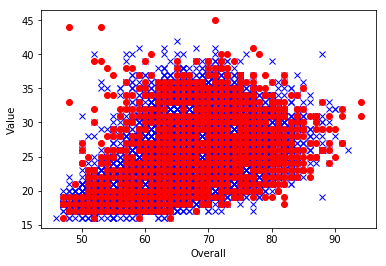

In [25]:
plt.figure()
plt.plot(normal.Overall,normal.Age,'bx')
plt.plot(abnormal.Overall,abnormal.Age,'ro')
plt.xlabel('Overall')
plt.ylabel('Value')
plt.show()

In [29]:
normal.shape

(16446, 98)

In [31]:
normal.head(100)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Club_Reputation,Attack_WR,Defense_WR,Position_Group,Position_Potential,Attacking,Skill,Movement,Power,Mentality,Defending,GoalKeeping,Potential_Difference,Continent
2,2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,2143,1,5.0,5.0,5.0,Lean,1,LW,10.0,516,0,4,175,150,84,84,84,89,89,89,89,89,89,89,89,88,81,81,81,88,65,60,60,60,65,60,47,47,47,60,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0,2.233333,High,Medium,Forward,3,79.2,88.8,91.6,70.6,73.833333,28.000000,11.8,1,South America
5,5,E. Hazard,27,Belgium,91,91,Chelsea,93000000.0,340000.0,2142,1,4.0,4.0,4.0,Normal,1,LF,10.0,2375,0,2,173,163,83,83,83,89,88,88,88,89,89,89,89,89,82,82,82,89,66,63,63,63,66,60,49,49,49,60,81.0,84.0,61.0,89.0,80.0,95.0,83.0,79.0,83.0,94.0,94.0,88.0,95.0,90.0,94.0,82.0,56.0,83.0,66.0,80.0,54.0,41.0,87.0,89.0,86.0,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,172100000.0,2.121212,High,Medium,Forward,3,79.0,86.8,92.2,73.4,74.666667,27.666667,9.0,0,Europe
8,8,Sergio Ramos,32,Spain,91,91,Real Madrid,51000000.0,380000.0,2201,1,4.0,3.0,3.0,Normal,1,RCB,15.0,4901,0,2,183,181,73,73,73,70,71,71,71,70,71,71,71,72,75,75,75,72,81,84,84,84,81,84,87,87,87,84,66.0,60.0,91.0,78.0,66.0,63.0,74.0,72.0,77.0,84.0,76.0,75.0,78.0,85.0,66.0,79.0,93.0,84.0,83.0,59.0,88.0,90.0,60.0,63.0,75.0,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,104600000.0,2.090909,High,Medium,Defender,3,72.2,74.0,76.0,79.6,76.333333,90.000000,9.2,0,Europe
11,11,T. Kroos,28,Germany,90,90,Real Madrid,76500000.0,355000.0,2190,1,4.0,5.0,3.0,Normal,1,LCM,8.0,1629,0,4,183,168,78,78,78,81,82,82,82,81,84,84,84,82,86,86,86,82,79,82,82,82,79,77,72,72,72,77,88.0,76.0,54.0,92.0,82.0,81.0,86.0,84.0,93.0,90.0,64.0,62.0,70.0,89.0,71.0,87.0,30.0,75.0,73.0,92.0,60.0,82.0,79.0,86.0,73.0,85.0,72.0,79.0,69.0,10.0,11.0,13.0,7.0,10.0,156800000.0,2.090909,Medium,Medium,Midfielder,3,78.4,86.8,71.2,71.4,77.500000,73.333333,10.2,0,Europe
12,12,D. Godín,32,Uruguay,90,90,Atlético Madrid,44000000.0,125000.0,1946,1,3.0,3.0,2.0,Lean,1,CB,10.0,3072,0,1,188,172,64,64,64,61,62,62,62,61,62,62,62,63,68,68,68,63,76,81,81,81,76,79,87,87,87,79,55.0,42.0,92.0,79.0,47.0,53.0,49.0,51.0,70.0,76.0,68.0,68.0,58.0,85.0,54.0,67.0,91.0,66.0,88.0,43.0,89.0,88.0,48.0,52.0,50.0,82.0,90.0,89.0,89.0,6.0,8.0,15.0,5.0,15.0,90200000.0,1.878788,Medium,High,Defender,3,63.0,59.8,66.6,71.0,68.166667,89.333333,9.8,0,South America
13,13,David Silva,32,Spain,90,90,Manchester City,60000000.0,285000.0,2115,0,4.0,2.0,4.0,Normal,1,LCM,21.0,3093,0,2,173,148,77,77,77,85,84,84,84,85,87,87,87,85,85,85,85,85,69,70,70,70,69,64,57,57,57,64,84.0,76.0,54.0,93.0,82.0,89.0,82.0,77.0,87.0,94.0,70.0,64.0,92.0,90.0,90.0,72.0,64.0,78.0,52.0,75.0,57.0,50.0,89.0,92.0,75.0,93.0,59.0,53.0,29.0,6.0,15.0,7.0,6.0,12.0,111000000.0,2.090909,High,Medium,Midfielder,3,77.8,85.8,81.2,68.2,76.000000,47.000000,9.2,0,Europe
15,15,P. Dybala,24,Argentina,89,94,Juventus,89000000.0,205000.0,2092,0,3.0,3.0,4.0,Normal,1,LF,21.0,1280,0,4,178,165,83,83,83,87,86,86,86,87,87,87,87,86,79,79,79,86,62,58,58,58,62,56,45,45,45,56,82.0,84.0,68.0,87.0,88.0,92.0,88.0,88.0,75.0,92.0,87.0,83.0,91.0,86.0,85.0,82.0,75.0,80.0,65.0,88.0,48.0,32.0,84.0,87.0,86.0,84.0,23.0,20.0,20.0,5.0,4.0,4.0,5.0,8.0,1

In [30]:
abnormal.shape

(1713, 98)

In [32]:
abnormal.head(100)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Club_Reputation,Attack_WR,Defense_WR,Position_Group,Position_Potential,Attacking,Skill,Movement,Power,Mentality,Defending,GoalKeeping,Potential_Difference,Continent
0,0,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,2202,0,5.0,4.0,4.0,Lean,1,RF,10.0,5297,0,3,170,159,88,88,88,92,93,93,93,92,93,93,93,91,84,84,84,91,64,61,61,61,64,59,47,47,47,59,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0,2.242424,Medium,Medium,Forward,2,85.0,93.4,91.6,75.6,71.500000,29.000000,10.8,0,South America
1,1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,2228,1,5.0,4.0,5.0,Normal,1,ST,7.0,175,0,4,188,183,91,91,91,89,90,90,90,89,88,88,88,88,81,81,81,88,65,61,61,61,65,61,53,53,53,61,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0,2.520000,High,Low,Forward,3,87.0,83.2,86.6,90.0,74.833333,27.333333,11.6,0,Europe
3,3,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,1471,1,4.0,3.0,1.0,Lean,1,GK,1.0,2741,0,2,193,168,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0,2.090909,Medium,Medium,GoalKeeper,0,22.8,30.2,61.6,43.4,42.666667,16.333333,88.8,2,Europe
4,4,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,2281,1,4.0,5.0,4.0,Normal,1,RCM,7.0,1220,0,5,180,154,82,82,82,87,87,87,87,87,88,88,88,88,87,87,87,88,77,77,77,77,77,73,66,66,66,73,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0,2.090909,High,High,Midfielder,3,80.8,87.2,80.2,82.0,80.833333,59.000000,11.2,1,Europe
6,6,L. Modrić,32,Croatia,91,91,Real Madrid,67000000.0,420000.0,2280,1,4.0,4.0,4.0,Lean,1,RCM,10.0,2344,0,2,173,146,77,77,77,85,84,84,84,85,87,87,87,86,88,88,88,86,82,81,81,81,82,79,71,71,71,79,86.0,72.0,55.0,93.0,76.0,90.0,85.0,78.0,88.0,93.0,80.0,72.0,93.0,90.0,94.0,79.0,68.0,89.0,58.0,82.0,62.0,83.0,79.0,92.0,82.0,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,137400000.0,2.090909,High,High,Midfielder,3,76.4,86.8,85.8,75.2,80.333333,69.666667,10.4,0,Europe
7,7,L. Suárez,31,Uruguay,91,91,FC Barcelona,80000000.0,455000.0,2346,1,5.0,4.0,3.0,Normal,1,RS,9.0,1635,0,3,183,190,87,87,87,86,87,87,87,86,85,85,85,84,79,79,79,84,69,68,68,68,69,66,63,63,63,66,77.0,93.0,77.0,82.0,88.0,87.0,86.0,84.0,64.0,90.0,86.0,75.0,82.0,92.0,83.0,86.0,69.0,90.0,83.0,85.0,87.0,41.0,92.0,84.0,85.0,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,164000000.0,2.242424,High,Medium,Forward,5,83.4,82.2,83.6,82.6,79.000000,48.333333,30.6,0,South America
9,9,J. Oblak,25,Slovenia,90,93,Atlético Madrid,68000000.0,94000.0,1331,1,3.0,3.0,1.0,Normal,1,GK,1.0,1630,0,3,188,192,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13.0,11.0,15.0,29.0,13.0,12.0,13.0,14.0,26.0,16.0,43.0,60.0,67.0,86.0,49.0,22.0,76.0,41.0,78.0,12.0,34.0,19.0,11.0,70.0,11.0,70.0,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0,144500000.0,1.878788,Medium,Medium,GoalKee

/Users/tammy/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning:

Using the stripplot function without specifying `order` is likely to produce an incorrect plot.



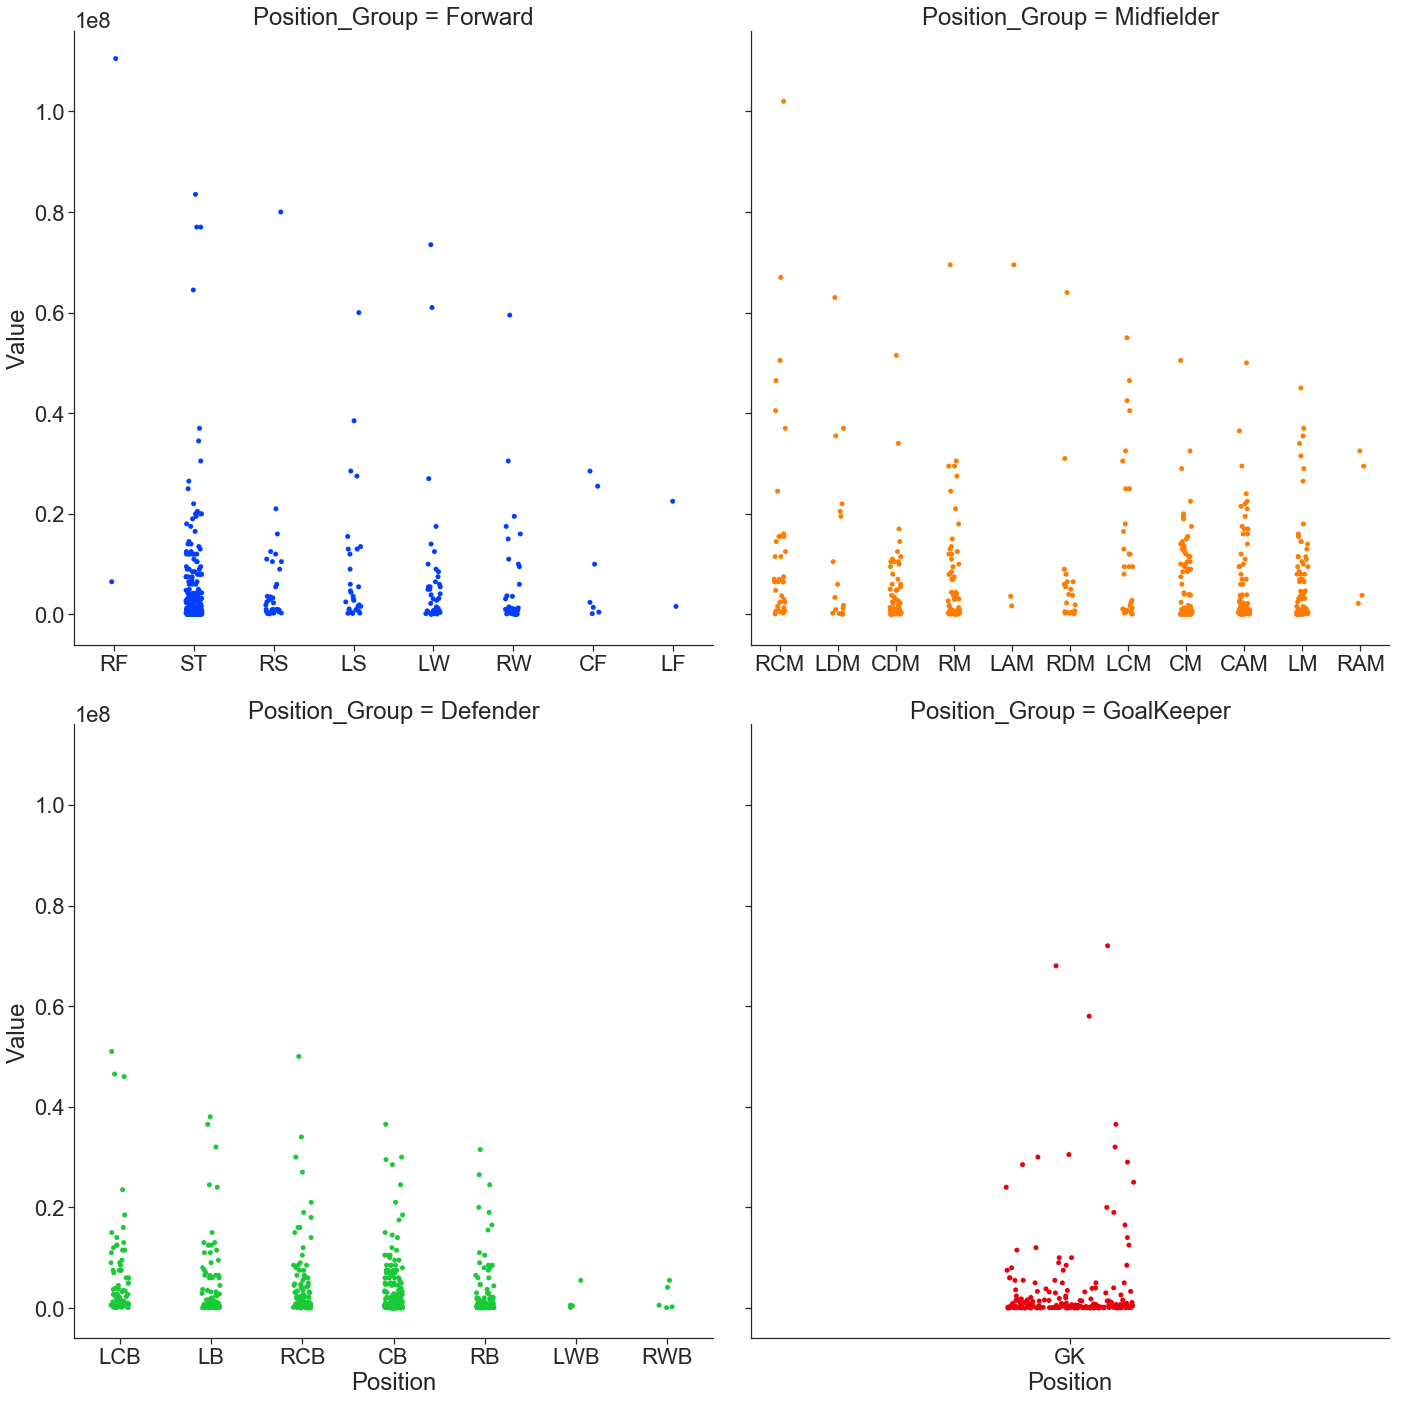

In [38]:
sns.set(font_scale=2, style ="ticks", palette = 'bright', color_codes=True)

g = sns.FacetGrid(abnormal, col="Position_Group", hue = 'Position_Group',
                  hue_order= ['Forward', 'Midfielder', 'Defender', 'GoalKeeper'],
                  col_order = ['Forward', 'Midfielder', 'Defender', 'GoalKeeper']
                  ,sharex=False, sharey=True, col_wrap=2, height=10)

g.map(sns.stripplot, 'Position' ,"Value" )

sns.set(font_scale=1, style ="ticks", palette = 'bright', color_codes=True)

---

## 2. LocalOutLierFactor Model

The LOF is a calculation that looks at the neighbors of a certain point to find out its density and compare this to the density of other points later on (relies on nearest neighbours search).

**k-distance:**
The distance of a point to its kth neighbor

**Reachability distance:**
reach-dist(a,b) = max{k-distance(b), dist(a,b)}

**Local reachability density:**
Tells us how far we have to travel from our point to reach the next point or cluster of point.

lrd(a) = 1/(sum(reach-dist(a,n))/k)

**Local Outlier Factor:**
Tells how likely a certain data point is an outlier/anomaly. 

k ratios of the lrd of each point to its neighboring points will be calculated and averaged. The LOF is basically the average ratio of the lrds of the neighbors of a to the lrd of a. 

    LOF ≈1 ⇒ no outlier
    LOF ≫1 ⇒ outlier

But based on the actual data set, it may be varied.

In [84]:
target_val = fifa.Value

target_wage = fifa.Wage

### `MODEL1 - USING MANHATTAN DISTANCE`

In [41]:
from sklearn.neighbors import LocalOutlierFactor

In [52]:
clf = LocalOutlierFactor(n_neighbors=2,metric='manhattan')
y_pred = clf.fit_predict(predictors_scaled)
scores = clf.negative_outlier_factor_
scores_of = -scores # Turn negative number to positive number

In [76]:
normal_OF = fifa[scores_of < scores_of.mean()+scores_of.std()]
abnormal_OF = fifa[scores_of >= scores_of.mean()+scores_of.std()]

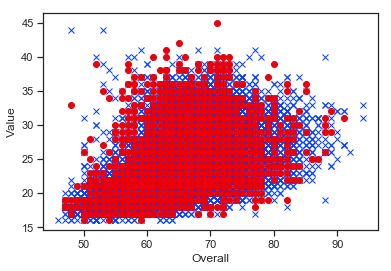

In [77]:
plt.figure()
plt.plot(normal_OF.Overall,normal_OF.Age,'bx')
plt.plot(abnormal_OF.Overall,abnormal_OF.Age,'ro')
plt.xlabel('Overall')
plt.ylabel('Value')
plt.show()

In [81]:
normal_OF.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Club_Reputation,Attack_WR,Defense_WR,Position_Group,Position_Potential,Attacking,Skill,Movement,Power,Mentality,Defending,GoalKeeping,Potential_Difference,Continent
0,0,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,2202,0,5.0,4.0,4.0,Lean,1,RF,10.0,5297,0,3,170,159,88,88,88,92,93,93,93,92,93,93,93,91,84,84,84,91,64,61,61,61,64,59,47,47,47,59,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0,2.242424,Medium,Medium,Forward,2,85.0,93.4,91.6,75.6,71.500000,29.000000,10.8,0,South America
1,1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,2228,1,5.0,4.0,5.0,Normal,1,ST,7.0,175,0,4,188,183,91,91,91,89,90,90,90,89,88,88,88,88,81,81,81,88,65,61,61,61,65,61,53,53,53,61,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0,2.520000,High,Low,Forward,3,87.0,83.2,86.6,90.0,74.833333,27.333333,11.6,0,Europe
2,2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,2143,1,5.0,5.0,5.0,Lean,1,LW,10.0,516,0,4,175,150,84,84,84,89,89,89,89,89,89,89,89,88,81,81,81,88,65,60,60,60,65,60,47,47,47,60,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0,2.233333,High,Medium,Forward,3,79.2,88.8,91.6,70.6,73.833333,28.000000,11.8,1,South America
3,3,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,1471,1,4.0,3.0,1.0,Lean,1,GK,1.0,2741,0,2,193,168,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0,2.090909,Medium,Medium,GoalKeeper,0,22.8,30.2,61.6,43.4,42.666667,16.333333,88.8,2,Europe
4,4,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,2281,1,4.0,5.0,4.0,Normal,1,RCM,7.0,1220,0,5,180,154,82,82,82,87,87,87,87,87,88,88,88,88,87,87,87,88,77,77,77,77,77,73,66,66,66,73,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0,2.090909,High,High,Midfielder,3,80.8,87.2,80.2,82.0,80.833333,59.000000,11.2,1,Europe


In [82]:
abnormal_OF.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Club_Reputation,Attack_WR,Defense_WR,Position_Group,Position_Potential,Attacking,Skill,Movement,Power,Mentality,Defending,GoalKeeping,Potential_Difference,Continent
7,7,L. Suárez,31,Uruguay,91,91,FC Barcelona,80000000.0,455000.0,2346,1,5.0,4.0,3.0,Normal,1,RS,9.0,1635,0,3,183,190,87,87,87,86,87,87,87,86,85,85,85,84,79,79,79,84,69,68,68,68,69,66,63,63,63,66,77.0,93.0,77.0,82.0,88.0,87.0,86.0,84.0,64.0,90.0,86.0,75.0,82.0,92.0,83.0,86.0,69.0,90.0,83.0,85.0,87.0,41.0,92.0,84.0,85.0,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,164000000.0,2.242424,High,Medium,Forward,5,83.4,82.2,83.6,82.6,79.0,48.333333,30.6,0,South America
20,20,Sergio Busquets,29,Spain,89,89,FC Barcelona,51500000.0,315000.0,2065,1,4.0,3.0,3.0,Lean,1,CDM,5.0,3774,0,5,188,168,71,71,71,74,76,76,76,74,79,79,79,76,83,83,83,76,79,86,86,86,79,78,82,82,82,78,62.0,67.0,68.0,89.0,44.0,80.0,66.0,68.0,82.0,88.0,50.0,52.0,66.0,87.0,52.0,61.0,66.0,86.0,77.0,54.0,85.0,87.0,77.0,87.0,60.0,90.0,90.0,86.0,80.0,5.0,8.0,13.0,9.0,13.0,105600000.0,2.242424,Medium,Medium,Midfielder,3,66.0,76.8,61.4,68.8,81.0,85.333333,9.6,0,Europe
22,22,M. Neuer,32,Germany,89,89,FC Bayern München,38000000.0,130000.0,1473,1,5.0,4.0,1.0,Normal,1,GK,1.0,2741,0,3,193,203,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15.0,13.0,25.0,55.0,11.0,30.0,14.0,11.0,59.0,48.0,54.0,60.0,51.0,84.0,35.0,25.0,77.0,43.0,80.0,16.0,29.0,30.0,12.0,70.0,47.0,70.0,17.0,10.0,11.0,90.0,86.0,91.0,87.0,87.0,62700000.0,2.517241,Medium,Medium,GoalKeeper,0,23.8,32.4,56.8,48.2,43.0,12.666667,88.2,0,Europe
28,28,J. Rodríguez,26,Colombia,88,89,FC Bayern München,69500000.0,315000.0,2171,0,4.0,3.0,4.0,Normal,1,LAM,10.0,0,1,1,180,172,80,80,80,84,83,83,83,84,85,85,85,83,81,81,81,83,69,68,68,68,69,65,58,58,58,65,90.0,83.0,62.0,89.0,90.0,85.0,89.0,86.0,83.0,90.0,73.0,67.0,83.0,85.0,76.0,86.0,54.0,70.0,68.0,92.0,64.0,55.0,80.0,89.0,81.0,87.0,52.0,41.0,44.0,15.0,15.0,15.0,5.0,14.0,0.0,2.517241,Medium,Medium,Midfielder,3,82.8,86.6,76.8,74.0,76.0,45.666667,12.8,1,South America
33,33,P. Aubameyang,29,Gabon,88,88,Arsenal,59000000.0,265000.0,2069,1,3.0,4.0,4.0,Lean,1,LM,14.0,335,0,3,188,176,84,84,84,83,83,83,83,83,81,81,81,81,73,73,73,81,64,58,58,58,64,61,52,52,52,61,77.0,88.0,79.0,77.0,86.0,79.0,80.0,74.0,64.0,82.0,93.0,95.0,76.0,87.0,70.0,82.0,79.0,76.0,76.0,79.0,43.0,48.0,90.0,77.0,76.0,86.0,27.0,25.0,36.0,6.0,9.0,15.0,9.0,9.0,112100000.0,2.030303,Medium,Low,Midfielder,3,81.4,75.8,84.2,78.4,70.0,29.333333,9.6,0,Africa


In [79]:
abnormal_OF.shape

(2672, 98)

In [80]:
normal_OF.shape

(15487, 98)

In [68]:
print(scores_of.min())
print(scores_of.max())
print(scores_of.mean())
print(scores_of.std())

0.8573057004160435
2.040377309198949
1.1050654592529712
0.11200437587361492


/Users/tammy/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning:

Using the stripplot function without specifying `order` is likely to produce an incorrect plot.



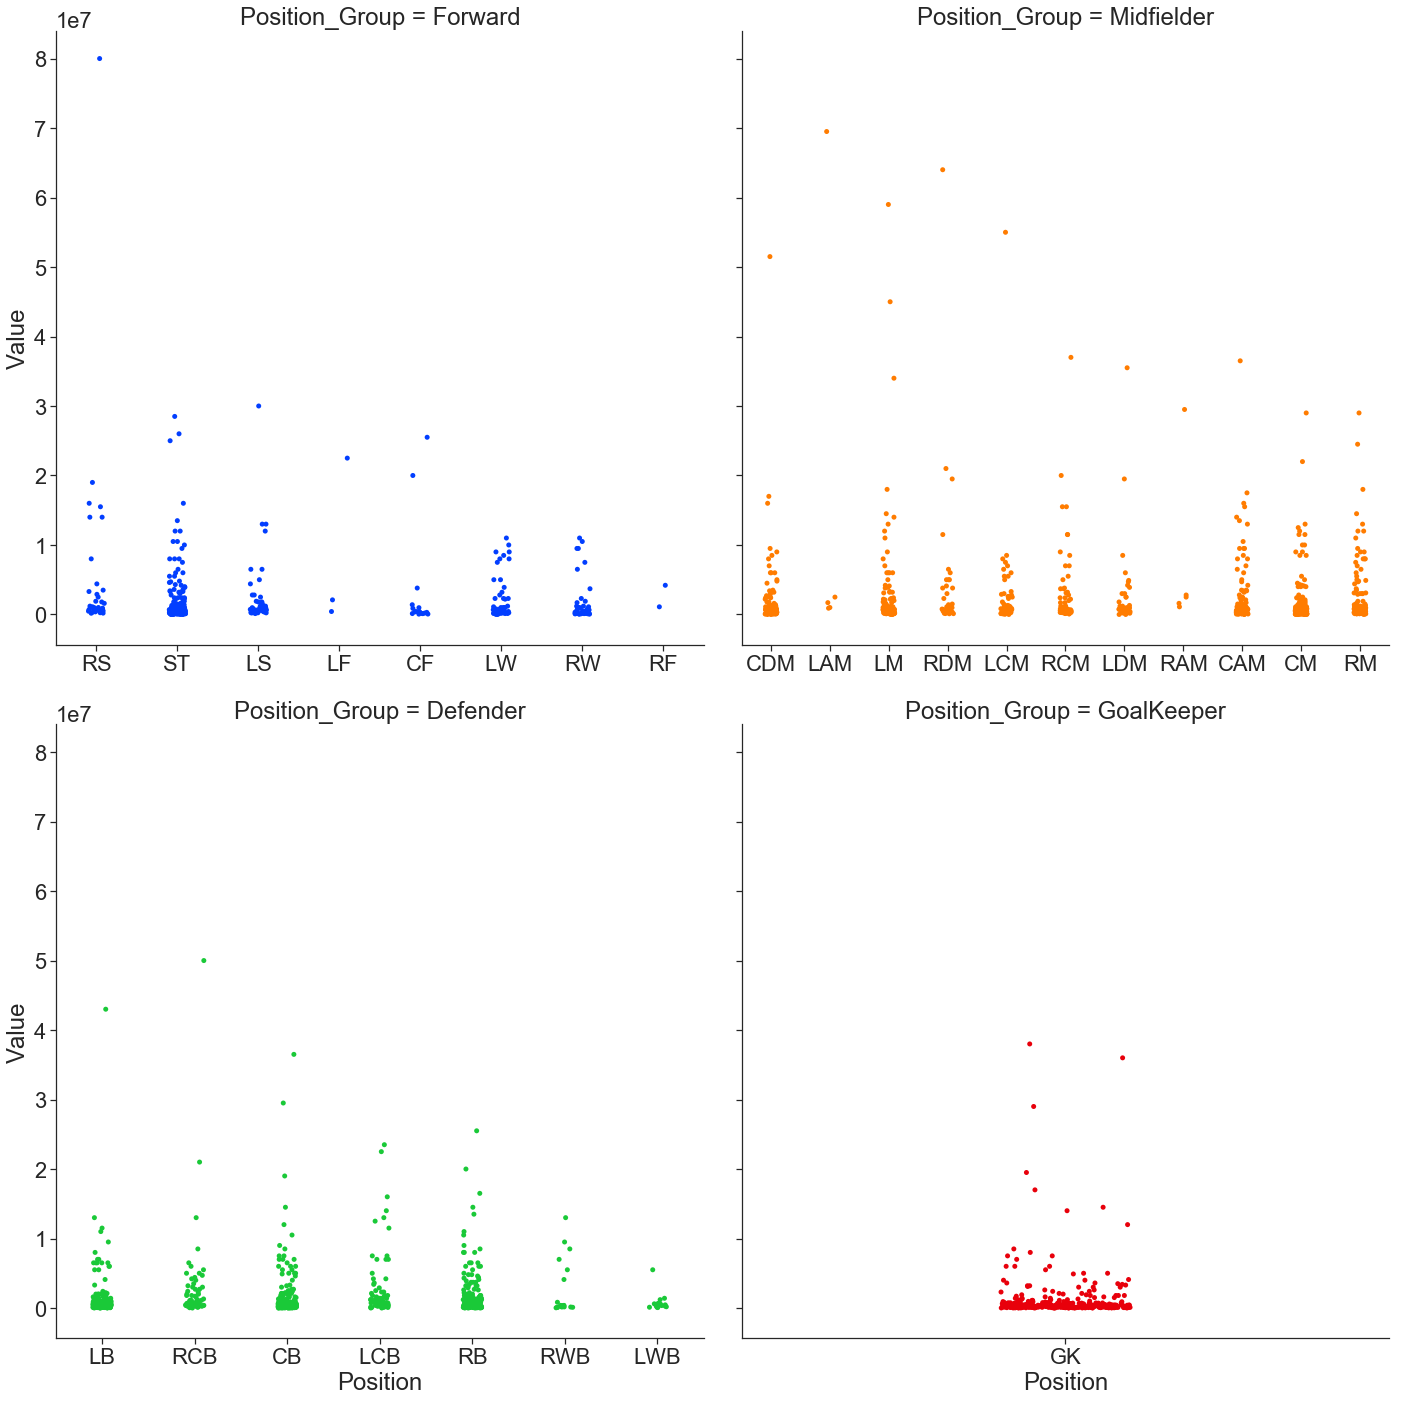

In [102]:
sns.set(font_scale=2, style ="ticks", palette = 'bright', color_codes=True)

g = sns.FacetGrid(abnormal_OF, col="Position_Group", hue = 'Position_Group',
                  hue_order= ['Forward', 'Midfielder', 'Defender', 'GoalKeeper'],
                  col_order = ['Forward', 'Midfielder', 'Defender', 'GoalKeeper']
                  ,sharex=False, sharey=True, col_wrap=2, height=10)

g.map(sns.stripplot, 'Position' ,"Value" )

sns.set(font_scale=1, style ="ticks", palette = 'bright', color_codes=True)

### `MODEL 2 - USING EUCLIDEAN DISTANCE`

In [85]:
clf = LocalOutlierFactor(n_neighbors=2,metric='euclidean')
y_pred = clf.fit_predict(predictors_scaled)
scores_eud = clf.negative_outlier_factor_
scores_of_eud = -scores_eud # Turn negative number to positive number

/Users/tammy/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/lof.py:236: FutureWarning:

default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.



In [86]:
normal_OF_eud = fifa[scores_of_eud < scores_of_eud.mean()+scores_of_eud.std()]
abnormal_OF_eud = fifa[scores_of_eud >= scores_of_eud.mean()+scores_of_eud.std()]

In [ ]:
# Decribe the score
print(scores_of_edu.min())
print(scores_of_edu.max())
print(scores_of_edu.mean())
print(scores_of_edu.std())

In [87]:
abnormal_OF_eud.shape

(2714, 98)

In [88]:
normal_OF_eud.shape

(15445, 98)

In [89]:
abnormal_OF_eud.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Club_Reputation,Attack_WR,Defense_WR,Position_Group,Position_Potential,Attacking,Skill,Movement,Power,Mentality,Defending,GoalKeeping,Potential_Difference,Continent
1,1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,2228,1,5.0,4.0,5.0,Normal,1,ST,7.0,175,0,4,188,183,91,91,91,89,90,90,90,89,88,88,88,88,81,81,81,88,65,61,61,61,65,61,53,53,53,61,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0,2.520000,High,Low,Forward,3,87.0,83.2,86.6,90.0,74.833333,27.333333,11.6,0,Europe
3,3,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,1471,1,4.0,3.0,1.0,Lean,1,GK,1.0,2741,0,2,193,168,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0,2.090909,Medium,Medium,GoalKeeper,0,22.8,30.2,61.6,43.4,42.666667,16.333333,88.8,2,Europe
6,6,L. Modrić,32,Croatia,91,91,Real Madrid,67000000.0,420000.0,2280,1,4.0,4.0,4.0,Lean,1,RCM,10.0,2344,0,2,173,146,77,77,77,85,84,84,84,85,87,87,87,86,88,88,88,86,82,81,81,81,82,79,71,71,71,79,86.0,72.0,55.0,93.0,76.0,90.0,85.0,78.0,88.0,93.0,80.0,72.0,93.0,90.0,94.0,79.0,68.0,89.0,58.0,82.0,62.0,83.0,79.0,92.0,82.0,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,137400000.0,2.090909,High,High,Midfielder,3,76.4,86.8,85.8,75.2,80.333333,69.666667,10.4,0,Europe
7,7,L. Suárez,31,Uruguay,91,91,FC Barcelona,80000000.0,455000.0,2346,1,5.0,4.0,3.0,Normal,1,RS,9.0,1635,0,3,183,190,87,87,87,86,87,87,87,86,85,85,85,84,79,79,79,84,69,68,68,68,69,66,63,63,63,66,77.0,93.0,77.0,82.0,88.0,87.0,86.0,84.0,64.0,90.0,86.0,75.0,82.0,92.0,83.0,86.0,69.0,90.0,83.0,85.0,87.0,41.0,92.0,84.0,85.0,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,164000000.0,2.242424,High,Medium,Forward,5,83.4,82.2,83.6,82.6,79.000000,48.333333,30.6,0,South America
20,20,Sergio Busquets,29,Spain,89,89,FC Barcelona,51500000.0,315000.0,2065,1,4.0,3.0,3.0,Lean,1,CDM,5.0,3774,0,5,188,168,71,71,71,74,76,76,76,74,79,79,79,76,83,83,83,76,79,86,86,86,79,78,82,82,82,78,62.0,67.0,68.0,89.0,44.0,80.0,66.0,68.0,82.0,88.0,50.0,52.0,66.0,87.0,52.0,61.0,66.0,86.0,77.0,54.0,85.0,87.0,77.0,87.0,60.0,90.0,90.0,86.0,80.0,5.0,8.0,13.0,9.0,13.0,105600000.0,2.242424,Medium,Medium,Midfielder,3,66.0,76.8,61.4,68.8,81.000000,85.333333,9.6,0,Europe


In [90]:
normal_OF_eud.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Club_Reputation,Attack_WR,Defense_WR,Position_Group,Position_Potential,Attacking,Skill,Movement,Power,Mentality,Defending,GoalKeeping,Potential_Difference,Continent
0,0,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,2202,0,5.0,4.0,4.0,Lean,1,RF,10.0,5297,0,3,170,159,88,88,88,92,93,93,93,92,93,93,93,91,84,84,84,91,64,61,61,61,64,59,47,47,47,59,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0,2.242424,Medium,Medium,Forward,2,85.0,93.4,91.6,75.6,71.500000,29.000000,10.8,0,South America
2,2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,2143,1,5.0,5.0,5.0,Lean,1,LW,10.0,516,0,4,175,150,84,84,84,89,89,89,89,89,89,89,89,88,81,81,81,88,65,60,60,60,65,60,47,47,47,60,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0,2.233333,High,Medium,Forward,3,79.2,88.8,91.6,70.6,73.833333,28.000000,11.8,1,South America
4,4,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,2281,1,4.0,5.0,4.0,Normal,1,RCM,7.0,1220,0,5,180,154,82,82,82,87,87,87,87,87,88,88,88,88,87,87,87,88,77,77,77,77,77,73,66,66,66,73,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0,2.090909,High,High,Midfielder,3,80.8,87.2,80.2,82.0,80.833333,59.000000,11.2,1,Europe
5,5,E. Hazard,27,Belgium,91,91,Chelsea,93000000.0,340000.0,2142,1,4.0,4.0,4.0,Normal,1,LF,10.0,2375,0,2,173,163,83,83,83,89,88,88,88,89,89,89,89,89,82,82,82,89,66,63,63,63,66,60,49,49,49,60,81.0,84.0,61.0,89.0,80.0,95.0,83.0,79.0,83.0,94.0,94.0,88.0,95.0,90.0,94.0,82.0,56.0,83.0,66.0,80.0,54.0,41.0,87.0,89.0,86.0,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,172100000.0,2.121212,High,Medium,Forward,3,79.0,86.8,92.2,73.4,74.666667,27.666667,9.0,0,Europe
8,8,Sergio Ramos,32,Spain,91,91,Real Madrid,51000000.0,380000.0,2201,1,4.0,3.0,3.0,Normal,1,RCB,15.0,4901,0,2,183,181,73,73,73,70,71,71,71,70,71,71,71,72,75,75,75,72,81,84,84,84,81,84,87,87,87,84,66.0,60.0,91.0,78.0,66.0,63.0,74.0,72.0,77.0,84.0,76.0,75.0,78.0,85.0,66.0,79.0,93.0,84.0,83.0,59.0,88.0,90.0,60.0,63.0,75.0,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,104600000.0,2.090909,High,Medium,Defender,3,72.2,74.0,76.0,79.6,76.333333,90.000000,9.2,0,Europe


In [92]:
normal_OF_eud.Value.describe()

count    1.544500e+04
mean     2.472918e+06
std      5.595000e+06
min      0.000000e+00
25%      3.250000e+05
50%      7.250000e+05
75%      2.100000e+06
max      1.185000e+08
Name: Value, dtype: float64

### `MODEL3 - USING COSINE DISTANCE`

In [118]:
clf = LocalOutlierFactor(n_neighbors=2,metric='cosine')
y_pred = clf.fit_predict(predictors_scaled)
scores_cosine = clf.negative_outlier_factor_
scores_of_cosine = -scores_cosine # Turn negative number to positive number

/Users/tammy/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/lof.py:236: FutureWarning:

default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.



In [94]:
# Divide to normal and abnormal data set
normal_OF_cosine = fifa[scores_of_cosine < scores_of_cosine.mean()+scores_of_cosine.std()]
abnormal_OF_cosine = fifa[scores_of_cosine >= scores_of_cosine.mean()+scores_of_cosine.std()]

In [99]:
# Decribe the score
print(scores_of_cosine.min())
print(scores_of_cosine.max())
print(scores_of_cosine.mean())
print(scores_of_cosine.std())

0.80366238141381
4.369842573125033
1.2324600151866218
0.2572164728401088


In [95]:
abnormal_OF_cosine.shape

(2524, 98)

In [96]:
normal_OF_cosine.shape

(15635, 98)

In [97]:
abnormal_OF_cosine.describe()

,ID,Age,Overall,Potential,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Real Face,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Club_Reputation,Position_Potential,Attacking,Skill,Movement,Power,Mentality,Defending,GoalKeeping,Potential_Difference
count,2524.000000,2524.000000,2524.000000,2524.000000,2.524000e+03,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2.524000e+03,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000,2524.000000
mean,10461.133122,24.767036,64.489699,70.040412,1.497300e+06,6946.139461,1572.111331,0.730983,1.101426,2.903724,2.286846,0.077258,20.103011,723.775753,0.070523,2.078843,181.573693,166.004754,49.431458,49.431458,49.431458,50.559826,50.207607,50.207607,50.207607,50.559826,50.480190,50.480190,50.480190,51.207607,50.049525,50.049525,50.049525,51.207607,50.118859,49.541204,49.541204,49.541204,50.118859,49.661648,48.861331,48.861331,48.861331,49.661648,48.481775,43.711569,50.605388,57.316561,40.755151,53.634311,45.847861,41.794374,51.939382,56.585578,63.799128,63.910856,62.450475,60.093106,63.000000,53.954437,64.412837,61.996434,64.979398,45.479002,55.012282,47.361331,48.195721,52.261886,46.717116,56.547940,47.327655,48.639065,46.597068,17.188986,16.936609,16.822504,16.974643,17.387480,2.546366e+06,1.104169,1.769414,48.174089,49.960301,62.650713,58.164422,51.016046,47.521263,17.062044,5.550713
std,5014.640293,4.772469,6.451525,5.794946,3.873985e+06,16279.105067,263.610824,0.443537,0.369269,0.709375,0.723953,0.267054,16.011827,803.948913,0.256077,1.327073,6.549222,15.188940,20.235016,20.235016,20.235016,20.926896,20.795050,20.795050,20.795050,20.926896,20.931404,20.931404,20.931404,20.972579,20.529889,20.529889,20.529889,20.972579,20.430274,20.528903,20.528903,20.528903,20.430274,20.384756,20.695530,20.695530,20.695530,20.384756,18.182391,18.706296,17.035355,14.535237,16.646718,18.736607,17.931649,17.026224,15.045100,16.405660,14.224171,14.349261,14.192058,8.785440,13.349208,16.567829,11.776217,16.043206,11.506860,18.602289,16.858820,19.227042,19.176851,13.946701,14.879247,11.644101,18.794991,20.168869,19.907248,18.035031,17.279038,16.985439,17.392651,18.400993,7.405815e+06,0.208249,0.680339,14.405121,15.369025,10.439821,10.702563,12.115822,18.951583,17.390014,5.373800
min,7.000000,16.000000,47.000000,50.000000,0.000000e+00,1000.000000,757.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,157.000000,121.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0

In [98]:
normal_OF_cosine.describe()

,ID,Age,Overall,Potential,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Real Face,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Club_Reputation,Position_Potential,Attacking,Skill,Movement,Power,Mentality,Defending,GoalKeeping,Potential_Difference
count,15635.000000,15635.000000,15635.000000,15635.000000,1.563500e+04,15635.000000,15635.000000,15635.000000,15635.000000,15635.000000,15635.000000,15635.000000,15635.000000,15635.000000,15635.000000,15635.000000,15635.000000,15635.000000,15635.000000,15635.000000,15635.000000,15635.000000,15635.000000,15635.000000,15635.000000,15635.000000,15635.000000,15635.000000,15635.000000,15635.000000,15635.000000,15635.000000,15635.000000,15635.000000,15635.000000,15635.000000,15635.000000,15635.000000,15635.000000,15635.000000,15635.000000,15635.000000,15635.000000,15635.000000,15635.000000,15635.000000,15635.000000,15635.000000,15635.000000,15635.000000,15635.000000,15635.000000,15635.000000,15635.000000,15635.000000,15635.000000,15635.000000,15635.000000,15635.000000,15635.000000,15635.000000,15635.000000,15635.000000,15635.000000,15635.000000,15635.000000,15635.000000,15635.000000,15635.000000,15635.000000,15635.000000,15635.000000,15635.000000,15635.000000,15635.000000,15635.000000,15635.000000,15635.000000,1.563500e+04,15635.000000,15635.000000,15635.000000,15635.000000,15635.000000,15635.000000,15635.000000,15635.000000,15635.000000,15635.000000
mean,8870.992325,25.179917,66.534058,71.525552,2.564461e+06,10370.274320,1602.067733,0.774097,1.115126,2.954333,2.373329,0.093316,19.445987,710.351903,0.069460,2.124528,181.116342,165.974992,51.636457,51.636457,51.636457,52.714551,52.443236,52.443236,52.443236,52.714551,52.671186,52.671186,52.671186,53.328750,51.954717,51.954717,51.954717,53.328750,51.213879,50.597570,50.597570,50.597570,51.213879,50.559194,49.459098,49.459098,49.459098,50.559194,49.936361,45.847841,52.571410,58.907899,43.256732,55.651359,47.384394,43.035689,52.836649,58.657435,64.745635,64.858714,63.673617,62.118068,64.122610,55.703102,65.198657,63.417461,65.365654,47.373265,56.007291,46.591238,50.243044,53.584778,48.844260,58.987336,47.274193,47.545891,45.510393,16.523761,16.303614,16.136744,16.294340,16.601663,4.469596e+06,1.114683,1.797825,50.104049,51.513105,63.903729,59.411628,52.376324,46.776825,16.372024,4.991493
std,5263.852959,4.651518,6.944988,6.162829,5.818915e+06,22793.610913,274.107260,0.418189,0.397862,0.651967,0.760575,0.290884,15.934357,769.585140,0.254242,1.306113,6.712671,15.658121,20.136053,20.136053,20.136053,20.787270,20.683502,20.683502,20.683502,20.787270,20.714064,20.714064,20.714064,20.713137,20.077052,20.077052,20.077052,20.713137,19.945411,20.245759,20.245759,20.245759,19.945411,19.987504,20.732518,20.732518,20.732518,19.987504,18.386338,19.639349,17.420014,14.714344,17.833913,18.923931,18.460691,17.545154,15.369865,16.714183,15.034576,14.694120,14.850070,9.014983,14.253399,17.331967,11.823850,15.862315,12.717929,19.352384,17.445350,20.923126,19.571021,14.170792,15.813758,11.366254,20.078310,21.892614,21.500679,17.638742,16.844965,16.422199,16.974843,17.880299,1.114001e+07,0.226184,0.647069,14.910836,15.941844,11.294510,11.123418,12.221004,20.664990,16.936236,5.420998
min,0.000000,16.000000,46.000000,48.000000,0.000000e+00,1000.000000,731.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,155.000000,110.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

In [101]:
predictors_scaled.head()

,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,...,Attacking,Skill,Movement,Power,Mentality,Defending,GoalKeeping,Potential_Difference,Attack_WR,Defense_WR,Position_CAM,Position_CB,Position_CDM,Position_CF,Position_CM,Position_GK,Position_LAM,Position_LB,Position_LCB,Position_LCM,Position_LDM,Position_LF,Position_LM,Position_LS,Position_LW,Position_LWB,Position_RAM,Position_RB,Position_RCB,Position_RCM,Position_RDM,Position_RF,Position_RM,Position_RS,Position_RW,Position_RWB,Position_ST,Continent_Africa,Continent_Asia,Continent_Europe,Continent_North America,Continent_Oceania,Continent_South America,Position_Group_Defender,Position_Group_Forward,Position_Group_GoalKeeper,Position_Group_Midfielder,Preferred Foot,Real Face,Body Type
0,1.258441,4.013364,3.697415,2.213984,9.864420,1.593944,2.167171,-1.670713,-0.447583,1.818665,1.818665,1.818665,1.901392,1.973099,1.973099,1.973099,1.901392,1.957564,1.957564,1.957564,1.828702,1.603458,1.603458,1.603458,1.828702,0.646400,0.519988,0.519988,0.519988,0.646400,0.427328,-0.114632,-0.114632,-0.114632,0.427328,1.865922,2.532567,1.018552,2.130287,2.435355,2.201445,2.491426,2.925736,2.237037,2.255198,1.767621,1.452129,1.862187,3.680643,2.195382,...,2.367037,2.652691,2.491225,1.477531,1.581089,-0.874941,-0.333393,-0.935691,-0.418496,-0.170930,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1
1,1.686666,4.013364,3.697415,2.309273,9.864420,1.593944,3.489672,1.019186,1.091577,1.967451,1.967451,1.967451,1.757292,1.828258,1.828258,1.828258,1.757292,1.716682,1.716682,1.716682,1.684202,1.454577,1.454577,1.454577,1.684202,0.696360,0.519988,0.519988,0.519988,0.696360,0.527106,0.174842,0.174842,0.174842,0.527106,1.865922,2.481351,2.111799,1.518005,2.491871,1.725503,1.839066,1.895887,1.584613,2.135338,1.633639,1.793436,1.591288,3.791628,0.426820,...,2.501665,2.010038,2.044295,2.777910,1.853981,-0.956497,-0.286336,-0.935691,1.498141,-2.159343,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,2
2,0.187878,3.724114,3.534396,1.997752,9.864420,3.108090,3.489672,-0.923519,-1.024769,1.620283,1.620283,1.620283,1.757292,1.779978,1.779978,1.779978,1.757292,1.764859,1.764859,1.764859,1.684202,1.454577,1.454577,1.454577,1.684202,0.696360,0.470696,0.470696,0.470696,0.696360,0.477217,-0.114632,-0.114632,-0.114632,0.477217,1.593650,2.122842,0.558238,1.722099,2.322322,2.148563,2.219609,2.525239,1.649855,2.195268,1.968594,1.725175,2.200811,3.569658,1.417214,...,1.976617,2.362867,2.491225,1.026010,1.772114,-0.923875,-0.274572,-0.751109,1.498141,-0.170930,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,1
3,0.401990,3.579489,3.534396,-0.465097,7.326477,0.079797,-1.800331,1.766380,0.129602,-2.545731,-2.545731,-2.545731,-2.517663,-2.516977,-2.516977,-2.516977,-2.517663,-2.522831,-2.522831,-2.522831,-2.554472,-2.565223,-2.565223,-2.565223,-2.554472,-2.551047,-2.486788,-2.486788,-2.486788,-2.551047,-2.516127,-2.382176,-2.382176,-2.382176,-2.516127,-1.782517,-1.667116,-1.800873,-0.590969,-1.690356,-1.976272,-1.422733,-1.365303,-0.111691,-0.981022,-0.510075,-0.459193,-0.237281,3.125717,-1.483228,...,-1.819883,-1.329238,-0.190353,-1.430261,-0.779428,-1.494763,4.254638,-0.566526,-0.418496,-0.170930,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,1
4,0.401990,3.579489,3.371377,2.503515,7.326477,3.108090,2.167171,-0.176325,-0.768242,1.521092,1.521092,1.521092,1.661226,1.683417,1.683417,1.683417,1.661226,1.716682,1.716682,1.716682,1.684202,1.752340,1.752340,1.752340,1.684202,1.295881,1.308650,1.308650,1.308650,1.295881,1.125774,0.802035,0.802035,0.802035,1.125774,2.356010,1.866764,0.155463,2.266350,2.209288,1.619738,2.056519,2.2963

---

## Gaussian Random Projection

In [136]:
# Gaussian Random Projection
from sklearn.random_projection import GaussianRandomProjection

n_components = 121
eps = None
random_state = 218

GRP = GaussianRandomProjection(n_components=n_components, \
                               eps=eps, random_state=random_state)

predictors_scaled_GRP = GRP.fit_transform(predictors_scaled)
predictors_scaled_GRP = pd.DataFrame(data=predictors_scaled_GRP, index=predictors_scaled.index)

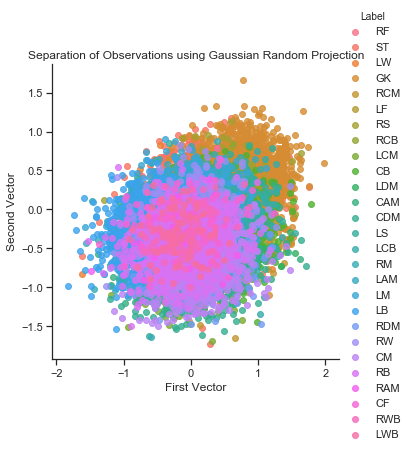

In [137]:
scatterPlot(predictors_scaled_GRP, fifa.Position, "Gaussian Random Projection")

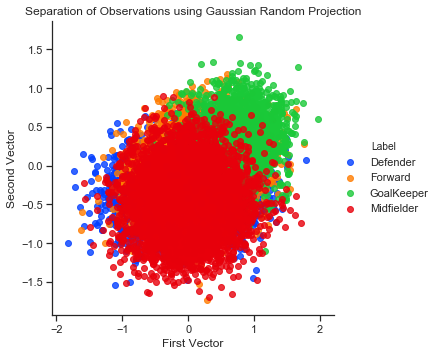

In [138]:
scatterPlot(predictors_scaled_GRP, fifa.Position_Group, "Gaussian Random Projection")

---

## SparseRandomProjection

In [110]:
from sklearn.random_projection import SparseRandomProjection

n_components = 121
density = 'auto'
eps = .01
dense_output = True
random_state = 218

SRP = SparseRandomProjection(n_components=n_components, \
        density=density, eps=eps, dense_output=dense_output, \
                                random_state=random_state)

predictors_SRP = SRP.fit_transform(predictors)
predictors_SRP = pd.DataFrame(data=predictors_SRP, index=predictors_scaled.index)


In [112]:
def scatterPlot(xDF, yDF, algoName):
    tempDF = pd.DataFrame(data=xDF.loc[:,0:1], index=xDF.index)
    tempDF = pd.concat((tempDF,yDF), axis=1, join="inner")
    tempDF.columns = ["First Vector", "Second Vector", "Label"]
    sns.lmplot(x="First Vector", y="Second Vector", hue="Label", \
               data=tempDF, fit_reg=False)
    ax = plt.gca()
    ax.set_title("Separation of Observations using "+algoName)

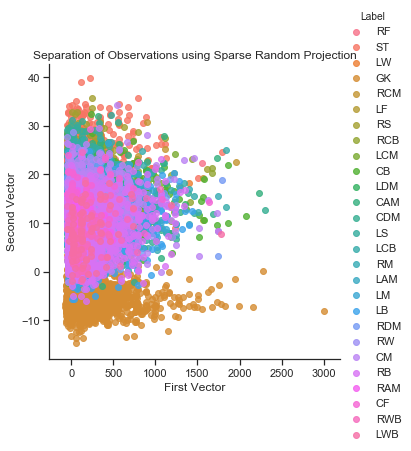

In [121]:
scatterPlot(predictors_SRP, fifa.Position, "Sparse Random Projection")

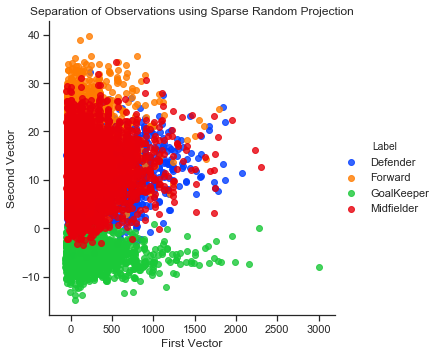

In [126]:
scatterPlot(predictors_SRP, fifa.Position_Group, "Sparse Random Projection")

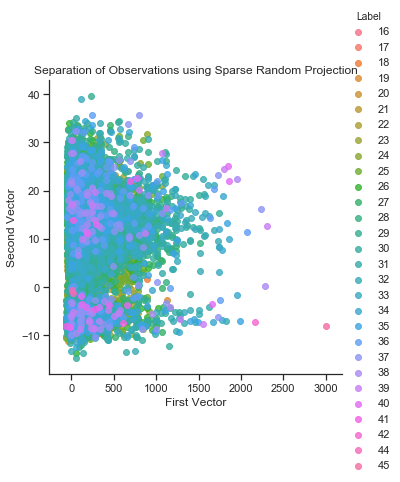

In [130]:
scatterPlot(predictors_SRP, fifa.Age, "Sparse Random Projection")

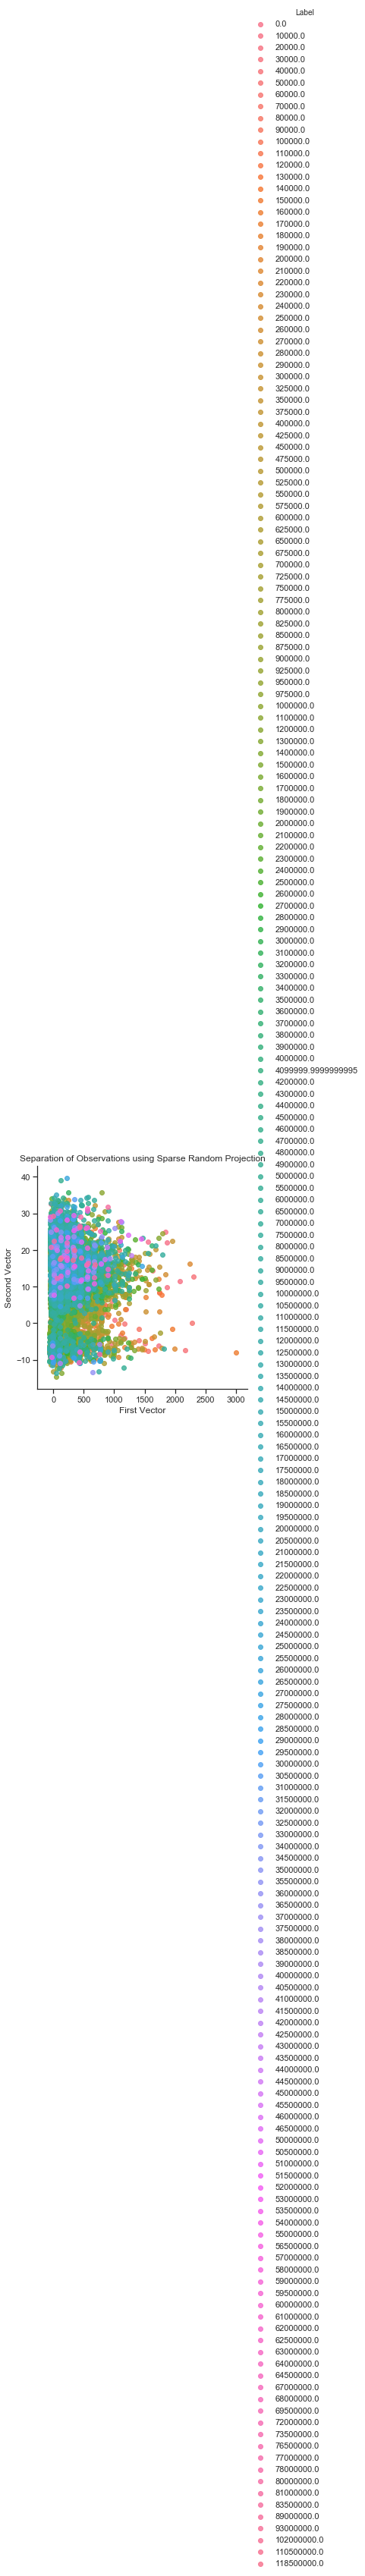

In [113]:
scatterPlot(predictors_SRP, target_val, "Sparse Random Projection")

---

## MiniBatchDictionaryLearning

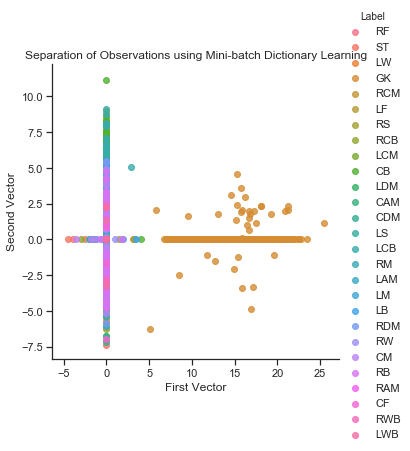

In [122]:
# Mini-batch dictionary learning
from sklearn.decomposition import MiniBatchDictionaryLearning

n_components = 121
alpha = 1
batch_size = 100
n_iter = 10
random_state = 218

miniBatchDictLearning = MiniBatchDictionaryLearning( \
    n_components=n_components, alpha=alpha, batch_size=batch_size, \
    n_iter=n_iter, random_state=random_state)

miniBatchDictLearning.fit(predictors_scaled)
predictors_scaled_miniBatchDictLearning = \
    miniBatchDictLearning.fit_transform(predictors_scaled)
predictors_scaled_miniBatchDictLearning = \
    pd.DataFrame(data=predictors_scaled_miniBatchDictLearning, index=predictors_scaled.index)

scatterPlot(predictors_scaled_miniBatchDictLearning, fifa.Position, \
            "Mini-batch Dictionary Learning")

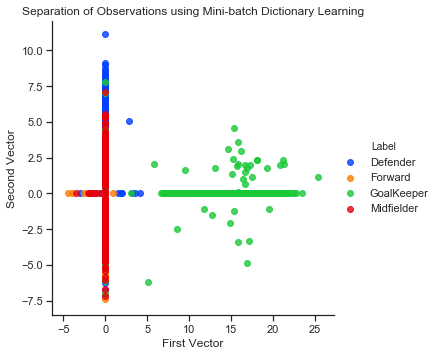

In [125]:
scatterPlot(predictors_scaled_miniBatchDictLearning, fifa.Position_Group, \
            "Mini-batch Dictionary Learning")